**Step by step**

1. Sélection et la division des caractéristiques

    Choix des caractéristiques
    
    Normalisation des caractéristiques

2. Construction du modèle

    choix des modèles de prédiction 
    
3. Entraînement du modèle

    Entraînement : Entraîner le modèle sur less données IMDB.
    
4. Optimisation du modèle 

    Choix des techniques telles que la validation croisée et Grid Search pour optimiser les hyperparamètres du modèle
    
5. Evaluation du modèle
    
    Évaluation : Évaluer la performance du modèle à l'aide de métriques telles que le RMSE, MSE et R2
        
        MSE (Mean Squared Error) : C'est la moyenne des carrés des écarts entre les valeurs prédites par le modèle et les valeurs réelles
        
        RMSE (Root Mean Squared Error) : C'est la racine carrée du MSE. Cela donne une idée de la quantité d'erreur dans le modèle. 
        Plus le RMSE est bas, plus les prédictions sont précises
        
        R² (R-squared ou coefficient de détermination) : C'est une mesure de la qualité de l'ajustement du modèle à la variabilité des données 


In [14]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from joblib import dump, load

In [3]:
# URL fournie
dataset_url = "https://raw.githubusercontent.com/AntoanetaStoyanova/PROJECT-IMBD/main/Datas/5000_movie_correction.csv"

# Chargement des données
df = pd.read_csv(dataset_url)
df.head(5)

,color,director_name,num_critic_for_reviews,duration,director_fb_likes,actor_3_fb_likes,actor_2_name,actor_1_fb_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_fb_likes,imdb_score,aspect_ratio,movie_fb_likes,color_binary
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,1
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,1
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,1
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,1
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,1


****Selection de la cible****

In [4]:
# Sélection des caractéristiques et de la cible
features = ['num_critic_for_reviews', 'director_fb_likes', 'cast_total_fb_likes','gross','num_user_for_reviews','budget' ,'duration', 'title_year', 'movie_fb_likes'] 
target = 'imdb_score'  


****Division des données****

In [5]:
# Division des données
X = df[features]
y =df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


****Normalisation des caractéristiques****

In [6]:
# Normalisation des caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

****Evaluation des modèles****

**1er : LinearRegression**

In [7]:
# 1) Grid Search pour les meilleurs hyperparamètres
# Définir les hyperparamètres à tester
parameters = {'fit_intercept': [True, False]}

# Initialiser le modèle de régression linéaire
model_LR = LinearRegression()

# Créer l'objet GridSearchCV avec le modèle de régression linéaire et les paramètres
grid_search = GridSearchCV(model_LR, parameters, cv=5, scoring='neg_mean_squared_error')

# Entraîner Grid Search avec les données d'entraînement pour trouver les meilleurs hyperparamètres
grid_search.fit(X_train_scaled, y_train)

# Sélectionner le meilleur modèle trouvé par Grid Search
best_model = grid_search.best_estimator_

In [8]:
# 2) Prédiction sur l'ensemble de test avec le modèle trouvé
y_pred_best = best_model.predict(X_test_scaled)

# Calcul des métriques pour le modèle trouvé
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

# Affichage des métriques pour le modèle trouvé
print(f'MSE : {mse_best}')
print(f'RMSE : {rmse_best}')
print(f'R²  : {r2_best}')


MSE : 0.9598577964295243
RMSE : 0.9797233264700419
R²  : 0.2662010653099074


**2eme : RandomForestRegressor**

In [9]:
# 1) Grid Search pour les meilleurs hyperparamètres
# Définir les hyperparamètres à tester
parameters = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}

# Initialiser le modèle
model = RandomForestRegressor(random_state=42)

# Créer l'objet GridSearchCV avec le modèle et les paramètres
grid_search = GridSearchCV(model, parameters, cv=5, scoring='neg_mean_squared_error')

# Entraîner Grid Search avec les données d'entraînement pour trouver les meilleurs hyperparamètres
grid_search.fit(X_train_scaled, y_train)

# Sélectionner le meilleur modèle trouvé par Grid Search
best_model = grid_search.best_estimator_

In [10]:
# 2) Entraînement du modèle retenu avec les meilleurs hyperparamètres trouvés
best_model.fit(X_train_scaled, y_train)

# Prédiction sur l'ensemble de test avec le modèle final
y_pred_best = best_model.predict(X_test_scaled)

# Calcul des métriques pour le modèle final
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

# Affichage des métriques pour le modèle final
print(f'MSE  : {mse_best}')
print(f'RMSE : {rmse_best}')
print(f'R² : {r2_best}')

MSE  : 0.6760388154587123
RMSE : 0.8222157961622437
R² : 0.48317702430708065



***Le modèle le plus adapté est celui qui a le R² de 0.4832, car il présente une meilleure capacité dans la variance des données par rapport au modèle précédent qui avait un R² de 0.2662. En outre, il a un MSE et un RMSE plus faibles, ce qui indique des erreurs de prédiction en moyenne plus faibles.***

****Choix du modele : RandomForestRegressor****

In [11]:
# 1) Grid Search pour les meilleurs hyperparamètres
# Définir les hyperparamètres à tester
parameters = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}

# Initialiser le modèle
model_RFR = RandomForestRegressor(random_state=42)

# Créer l'objet GridSearchCV avec le modèle et les paramètres
grid_search = GridSearchCV(model_RFR, parameters, cv=5, scoring='neg_mean_squared_error')

# Entraîner Grid Search avec les données d'entraînement pour trouver les meilleurs hyperparamètres
grid_search.fit(X_train_scaled, y_train)

# Sélectionner le meilleur modèle trouvé par Grid Search
model = grid_search.best_estimator_


In [12]:
# 2) Entraînement du modèle retenu avec les meilleurs hyperparamètres trouvés
model.fit(X_train_scaled, y_train)

# Prédiction sur l'ensemble de test avec le modèle final
y_pred_best = model.predict(X_test_scaled)

# Calcul des métriques pour le modèle final
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

# Affichage des métriques pour le modèle final
print(f'MSE (Meilleur modèle) : {mse_best}')
print(f'RMSE (Meilleur modèle) : {rmse_best}')
print(f'R² (Meilleur modèle) : {r2_best}')

MSE (Meilleur modèle) : 0.6760388154587123
RMSE (Meilleur modèle) : 0.8222157961622437
R² (Meilleur modèle) : 0.48317702430708065


****Sauvegarde du modèle pour le déployer dans une application****

In [15]:
# Sauvegarde du modèle dans un fichier
dump(model, 'modeleIMDB.joblib')

# Pour charger le modèle plus tard
modele_charge = load('modeleIMDB.joblib')


Afficher les Prédictions et les Valeurs Réelles

In [17]:

# Comparer les valeurs réelles et prédites
df_predictions = pd.DataFrame({'Réel': y_test, 'Prédit': y_pred_best})
print(df_predictions)


      Réel    Prédit
33     6.8  6.756833
555    7.1  6.199115
4692   7.0  5.017470
3131   3.8  5.202675
3921   5.3  5.501486
...    ...       ...
314    6.9  6.075156
4352   7.2  6.857580
1872   6.3  5.951770
627    6.2  6.376650
2813   7.7  7.128759

[955 rows x 2 columns]


Visualiser les Résultats

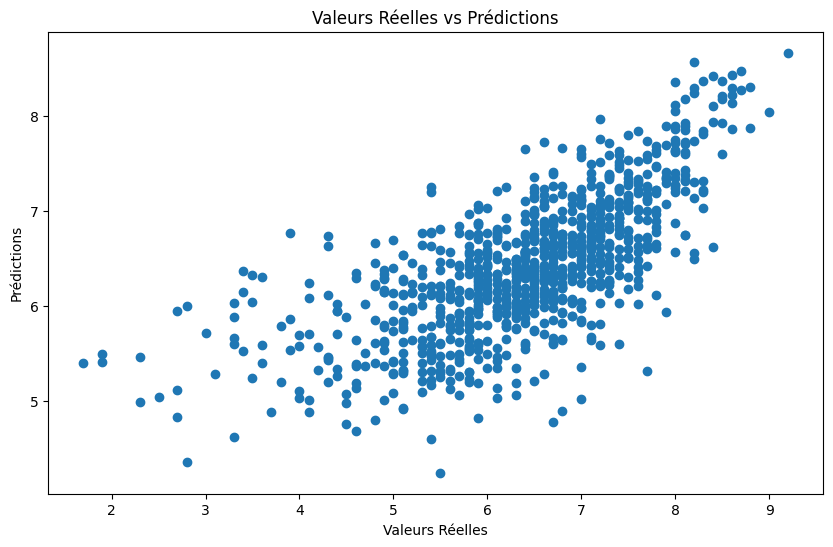

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best)
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')
plt.title('Valeurs Réelles vs Prédictions')
plt.show()


Analyser les Résidus
Les résidus (la différence entre les valeurs réelles et prédites) peuvent donner des informations sur la performance du modèle.

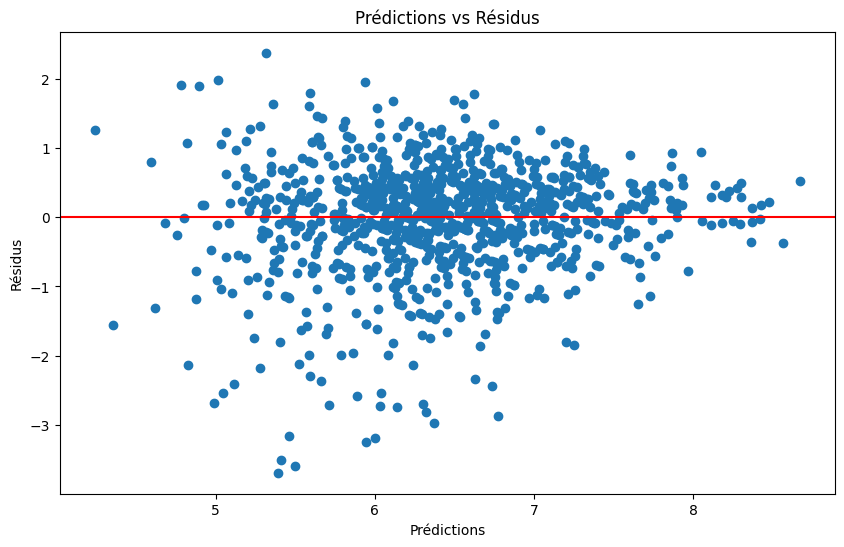

In [19]:
# Calcul des résidus
residus = y_test - y_pred_best

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_best, residus)
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.title('Prédictions vs Résidus')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


Évaluer la Distribution des Erreurs
Vérifiez la distribution des erreurs (résidus) pour voir si elles sont normalement distribuées, ce qui est une bonne indication que le modèle fonctionne bien

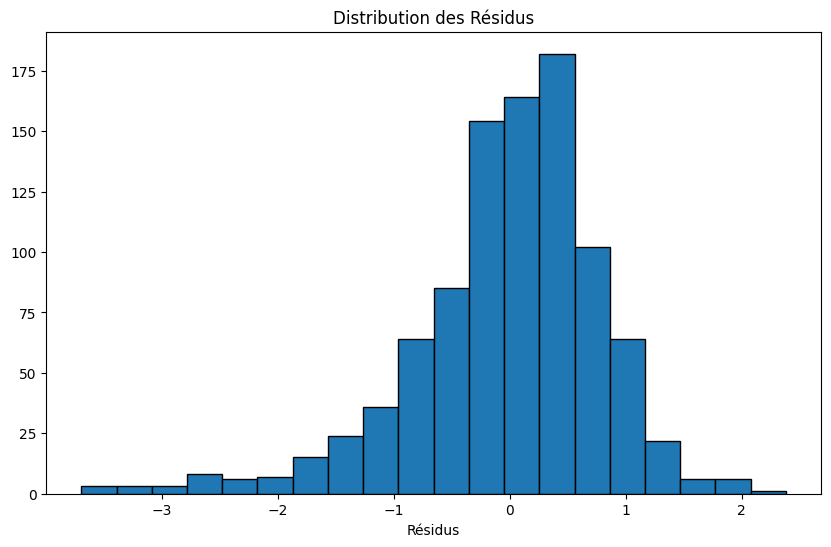

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(residus, bins=20, edgecolor='black')
plt.xlabel('Résidus')
plt.title('Distribution des Résidus')
plt.show()


In [21]:
df_predictions.describe()


,Réel,Prédit
count,955.000000,955.000000
mean,6.389948,6.411234
std,1.144307,0.723279
min,1.700000,4.243214
25%,5.800000,5.950653
50%,6.500000,6.377068
75%,7.200000,6.838157
max,9.200000,8.668000
